In [29]:
%matplotlib inline

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples

from scipy.cluster.hierarchy import linkage, dendrogram

# Clustering

## Live Demos

In [31]:
# Function to display data clusters
def display_cluster(x, y, colors):
    plt.scatter(x, y, c = colors)
    plt.show()

In [55]:
def apply_k_means(k, attributes, clusters, init = "random"):
    k_means = KMeans(n_clusters = k, init = init)
    k_means.fit(attributes)
    cluster_centers = k_means.cluster_centers_
    predictions = k_means.predict(attributes)
    plt.scatter(attributes[:, 0], attributes[:, 1], c = predictions)
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c = "red")
    plt.show()  

In [74]:
attributes, clusters = make_blobs(n_samples = 300, centers = 3)

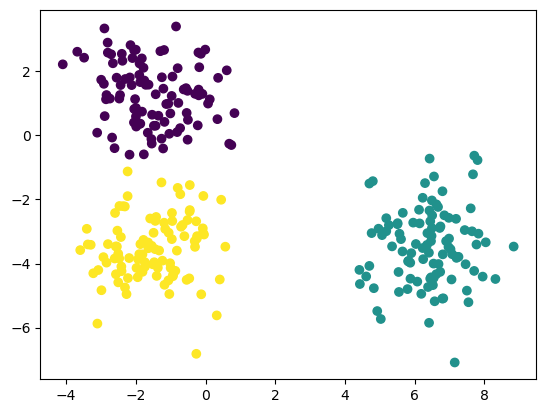

In [75]:
# Show original blob clusters
display_cluster(attributes[:, 0], attributes[:, 1], clusters)

C:\Users\tstoyn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tstoyn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


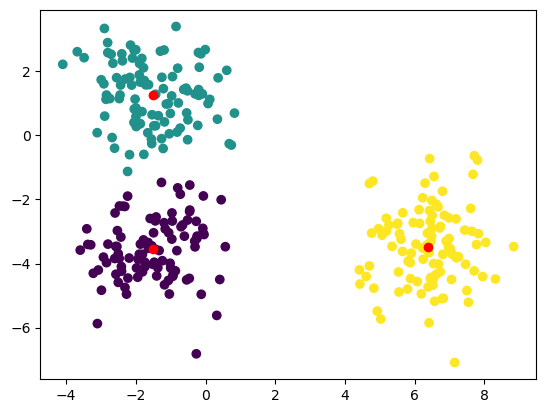

In [77]:
# Apply k-means and display the clustering result
apply_k_means(3, attributes, clusters)

C:\Users\tstoyn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tstoyn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


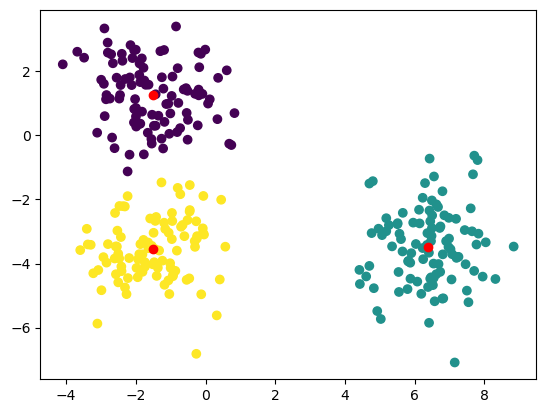

In [78]:
# Apply k-means++ and display the clustering result
apply_k_means(3, attributes, clusters, init = "k-means++")

In [49]:
attributes_circles, clusters_circles = make_circles(noise = 0.1, factor = 0.3)

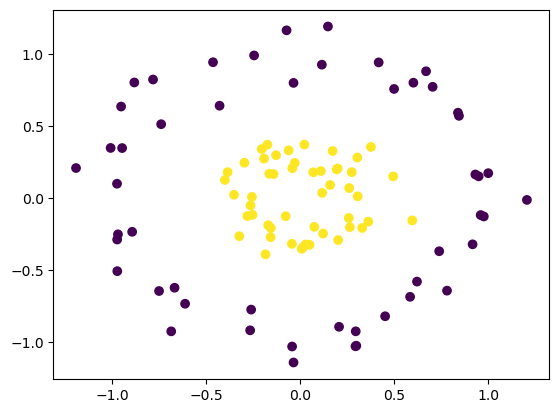

In [52]:
# Show original circle clusters
display_cluster(attributes_circles[:, 0], attributes_circles[:, 1], clusters_circles)

C:\Users\tstoyn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tstoyn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


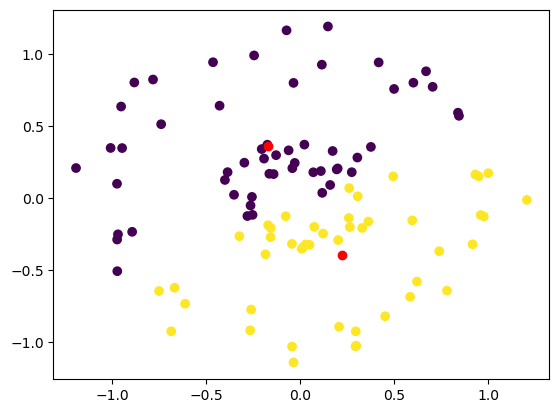

In [53]:
# Apply k-means and display the clustering result
apply_k_means(2, attributes_circles, clusters_circles)

C:\Users\tstoyn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tstoyn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


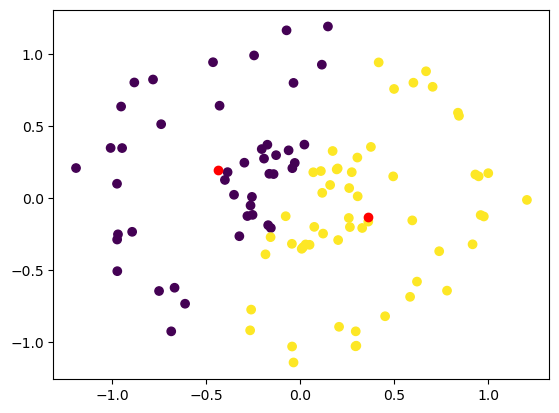

In [79]:
# Apply k-means++ and display the clustering result
apply_k_means(2, attributes_circles, clusters_circles, init = "k-means++")

# Finding an Optimal Number of Clusters

## Elbow method

C:\Users\tstoyn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tstoyn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\tstoyn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\tstoyn\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is kno

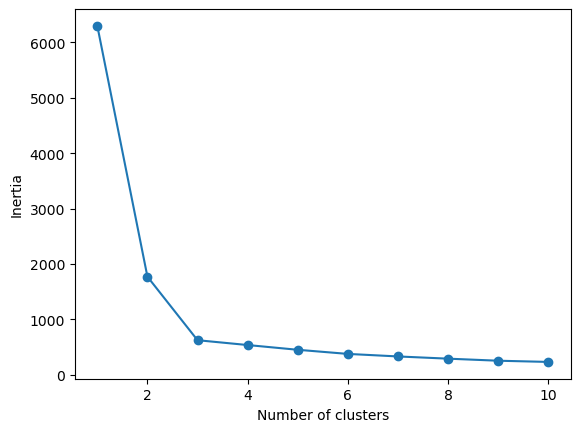

In [84]:
inertias = [] 
for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(attributes)
    inertias.append(km.inertia_)
plt.plot(range(1,11), inertias, marker = "o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

# Hierarchical Clustering

In [88]:
aggl = AgglomerativeClustering(n_clusters = 3, linkage = "complete")

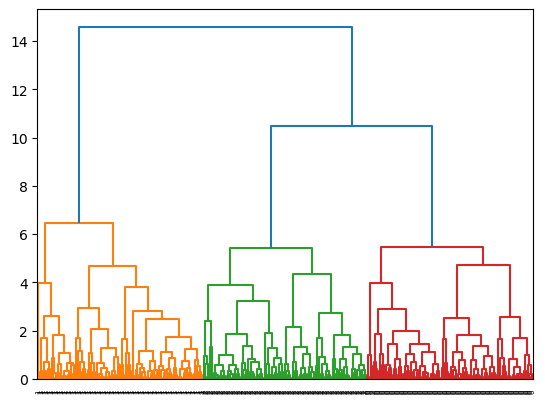

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [42.5, 42.5, 80.0, 80.0],
  [12.5, 12.5, 61.25, 61.25]],
 'dcoord': [[0.0, 4.684119494335774, 4.684119494335774, 0.0],
  [0.0, 6.473094568003613, 6.473094568003613, 4.684119494335774],
  [0.0, 4.337634026041623, 4.337634026041623, 0.0],
  [0.0, 5.4367367972491385, 5.4367367972491385, 4.337634026041623],
  [0.0, 3.9862771110103536, 3.9862771110103536, 0.0],
  [0.0, 4.708301225705927, 4.708301225705927, 0.0],
  [3.9862771110103536,
   5.452017327850687,
   5.452017327850687,
   4.708301225705927],
  [5.4367367972491385,
   10.481752006857114,
   10.481752006857114,
   5.452017327850687],
  [6.473094568003613,
   14.590188778466024,
   14.590188778466024,
   10.481752006857114]],
 'ivl': ['(23)',
  '(27)',
  '(50)',
  '(49)',
  '(19)',
  '(31)',
  '(4)',
  '(41)',
  '(34)',
  '(22)'],
 

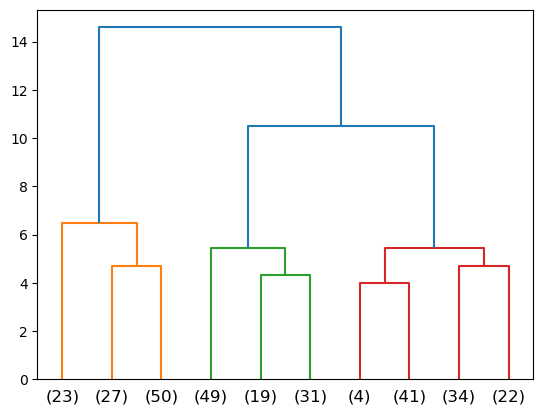

In [90]:
row_clusters = linkage(attributes, method = "complete", metric = "euclidean")
dendrogram(row_clusters, labels = clusters)
plt.show()

# Show only the last 10 merged clusters
dendrogram(row_clusters, labels = clusters, truncate_mode = "lastp", p = 10)

# DBSCAN

## Density-based Spatial Clustering of Applications with Noise

In [93]:
db = DBSCAN(eps = 0.2, min_samples = 5, metric = "euclidean")

In [94]:
db.fit(attributes)

DBSCAN(eps=0.2)

In [97]:
predictions = db.fit_predict(attributes)  

In [98]:
predictions

array([-1, -1,  4, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  4, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  4, -1,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  3, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2, -1,
       -1, -1, -1,  3, -1,  3, -1, -1,  1,  4, -1, -1, -1,  4, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1